

# Project: Investigate a Dataset - TMDB Movie Datas

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


- **id** : Id in the dataset
- **imdb_id**     :             IMDB ID
- **popularity**   :            Popularity score of movie
- **budget**          :          Money spent when making the movie
- **revenue**      :            Money generated from the movie sales
- **original_title** :          Title of movie
- **cast** :                     Actors
- **homepage** :                 Website for movie
- **director** :                 Director of the movie
- **tagline** :                  Movie tagline
- **keywords** :                 Keywords of the movie
- **overview** :                 Brief description of movie
- **runtime** :                  Length of movie
- **genres** :                   Genres the movie falls into to
- **production_companies** :     Companies involved in the production of the movie
- **release_date** :             DAte the mmovie was released
- **vote_count** :               Number of votes
- **vote_average** :             Average vote
- **release_year** :             Year movie was released
- **budget_adj** :               Budget
- **revenue_adj** :              Revenue

### Question(s) for Analysis

>1. Top 10 movies by budget
>2. Top 10 movies by profit
>3. How is the movie rating(Average Vote) related to revenue?
>4. Is a higher movie rating (average vote) related to movie budget?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [10]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [2]:
#pd.options.display.max_rows = 9999
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')


<a id='wrangling'></a>
## Data Wrangling



In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Check the number of rows and columns
df.shape

(10866, 21)

In [5]:
#Get info of columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#Get summary statistics of each column in data set
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#check for duplicated items
df.duplicated().sum()

1


## Data Cleaning

 


### Remove Duplicates
>Find and remove duplicated data

In [5]:
# Remove the duplicated rows
df.drop_duplicates(inplace=True)

### Remove columns not required
>Drop columns that are not needed in the analysis

In [14]:
arr = ['imdb_id','homepage','tagline','keywords','vote_count','overview','budget_adj','revenue_adj']
df.drop(arr,axis=1,inplace = True)
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year'],
      dtype='object')

In [15]:
# Explore dataset
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3,2015


In [16]:
# Describe data
df.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,5.975012,2001.321859
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,0.935138,12.813260
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [21]:
# Drop cast
df.drop('cast', axis=1, inplace = True)
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year'],
      dtype='object')

In [3]:
# Add Profit Column
df['profit'] = df['revenue'] - df['budget']

In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Top 10 most profitable movies

In [4]:
# Group movies by name and sort them in Ascending order
profit = df.groupby(['original_title'])['profit'].sum()
profit = profit.reset_index().sort_values(by='profit', ascending=False)[:9]
print(profit['profit'])

818     2544505847
7375    1868178225
9718    1632034188
4423    1363528810
3210    1316249360
7850    1288080742
3593    1202817822
3191    1127284869
820     1125035767
Name: profit, dtype: int64


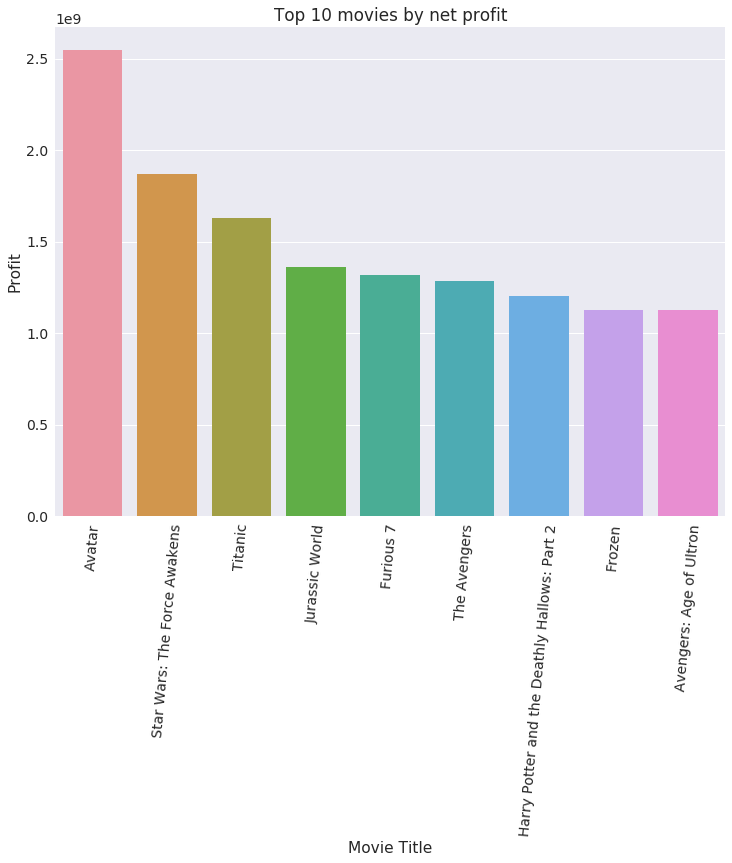

In [5]:
# Plot a bar chat of the high grossing movies

def drawBarChart(xValue,yValue, dt, title,x_label,y_label):
    sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)
    sns.barplot(x = xValue, y = yValue, data = dt)
    plt.xticks(rotation=85)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

drawBarChart(profit['original_title'],profit['profit'],profit,'Top 10 movies by net profit','Movie Title','Profit')

 

### Research Question 2 : Top 10 movies by budget

In [7]:
# Group movies by name and sort them in Ascending order
budg = df.groupby(['original_title'])['budget'].sum()
budg = budg.reset_index().sort_values(by='budget', ascending=False)[:9]
print(budg)

                                   original_title     budget
9530                            The Warrior's Way  425000000
6165  Pirates of the Caribbean: On Stranger Tides  380000000
6163     Pirates of the Caribbean: At World's End  300000000
3369                                     Godzilla  290000000
820                       Avengers: Age of Ultron  280000000
7850                                 The Avengers  280000000
7557                             Superman Returns  270000000
7664                                      Tangled  260000000
4355                                  John Carter  260000000


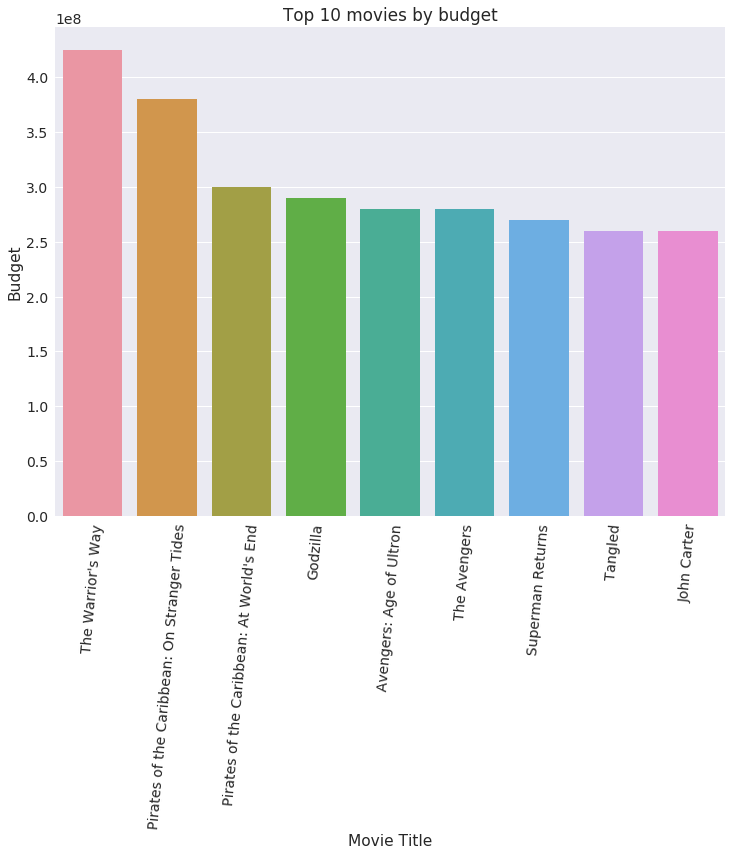

In [8]:
# Plot a bar chat of the high grossing movies

drawBarChart(budg['original_title'],budg['budget'],budg,'Top 10 movies by budget','Movie Title','Budget')

### Research Question 3 : How is the movie rating(averate vote) related to revenue?

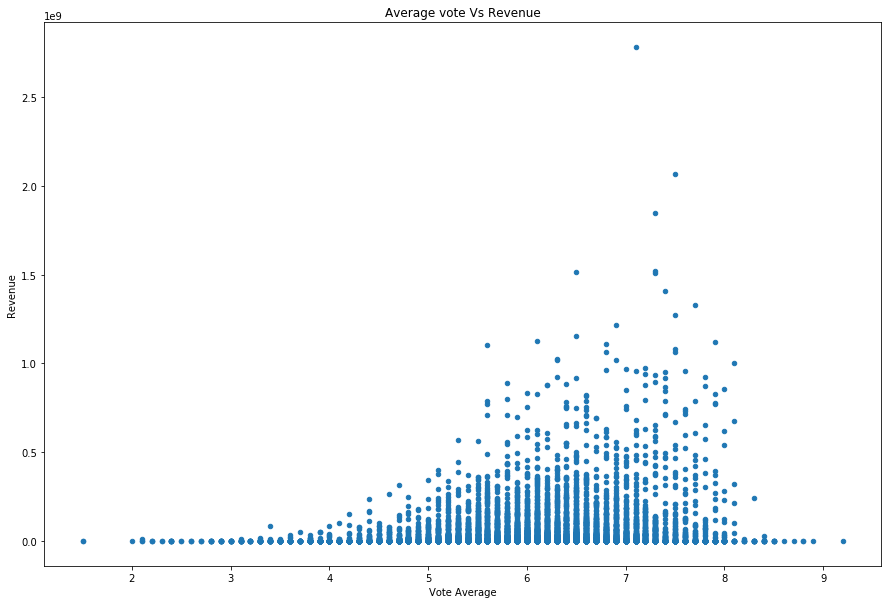

In [4]:
#Scatter plot of average vote against revenue
df.plot(x='vote_average', y='revenue', kind='scatter', figsize=(15,10))
plt.title('Average vote Vs Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue');

The scatterplot shows a positive relationship between the Vote Average and Revenue.
This means movies with a high rating are more likely to generate high revenue.

### Research Question 4 : Is a higher movie rating (average vote) related to movie budget?

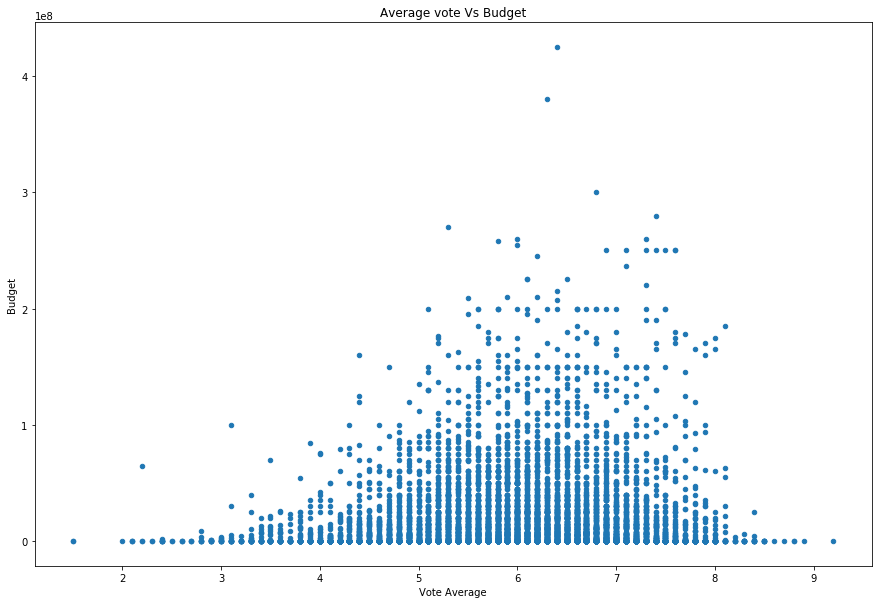

In [7]:
#Scatter plot of average vote against revenue
df.plot(x='vote_average', y='budget', kind='scatter', figsize=(15,10))
plt.title('Average vote Vs Budget')
plt.xlabel('Vote Average')
plt.ylabel('Budget');

The scatterplot shows a positive relationship between the Vote Average and Budget.
This means movies with a higher budgets recieves high rating.

<a id='conclusions'></a>
## Conclusions
> From the analysis above we can conclude that movies with high ratings(average vote) are more likely to generate high revenue.
> We can also conclude  that a movie with a high budget is more likely to recieve high ratings(average vote).
> From the two bar charts we can see that only two movies with high budgets (The Avengers and Avengers: Age of Ultron) managed to generate high profits. This means having a high budget decreases the profitability of a movie.

## Limitations
> 1. The budget and revenue had no currency which in turn means the profit estimated also has no currency
> 2. Some columns had missing values but they were not used in this analysis
> 3. Some columns had multiple values like cast and production companies which makes analysis on those columns difficult.




In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0